<a href="https://colab.research.google.com/github/Kittx3D/YOLO/blob/main/YOLO_v4_%26_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detectando Objetos com YOLO v4 - Implementação com OpenCV**

# **Etapa 1 - Importando as bibliotecas**

In [4]:
import cv2
print(cv2.__version__)

4.7.0


In [5]:
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import zipfile

## Etapa 2 - Conectando com o Google Drive

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Etapa 3 - Carregando os arquivos do modelo Treinado

In [7]:
path = '/content/gdrive/MyDrive/YOLO-Caio/modelo_YOLOv4.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [8]:
labels_path = os.path.sep.join(['/content/cfg', 'coco.names'])

In [9]:
LABELS = open(labels_path).read().strip().split('\n')
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [10]:
len(LABELS)

80

In [11]:
config_path = os.path.sep.join(['/content/cfg', 'yolov4.cfg'])
weights_path = os.path.sep.join(['/content', 'yolov4.weights'])

In [12]:
net = cv2.dnn.readNet(config_path, weights_path)

In [13]:
net

< cv2.dnn.Net 0x7f33882bb4f0>

# Etapa 4 - Definindo mais configurações para a detecção

In [14]:
COLORS = np.random.randint(0, 255, size=(len(LABELS),3), dtype ='uint8') #Criação de uma matriz/vetor de cores de acordo com o número de classes

In [15]:
ln = net.getLayerNames()
print('Todas as camadas da rede neural')
print(ln)
print('Total de camadas: '+str(len(ln)))

Todas as camadas da rede neural
('conv_0', 'bn_0', 'mish_1', 'conv_1', 'bn_1', 'mish_2', 'conv_2', 'bn_2', 'mish_3', 'identity_3', 'conv_4', 'bn_4', 'mish_5', 'conv_5', 'bn_5', 'mish_6', 'conv_6', 'bn_6', 'mish_7', 'shortcut_7', 'conv_8', 'bn_8', 'mish_9', 'concat_9', 'conv_10', 'bn_10', 'mish_11', 'conv_11', 'bn_11', 'mish_12', 'conv_12', 'bn_12', 'mish_13', 'identity_13', 'conv_14', 'bn_14', 'mish_15', 'conv_15', 'bn_15', 'mish_16', 'conv_16', 'bn_16', 'mish_17', 'shortcut_17', 'conv_18', 'bn_18', 'mish_19', 'conv_19', 'bn_19', 'mish_20', 'shortcut_20', 'conv_21', 'bn_21', 'mish_22', 'concat_22', 'conv_23', 'bn_23', 'mish_24', 'conv_24', 'bn_24', 'mish_25', 'conv_25', 'bn_25', 'mish_26', 'identity_26', 'conv_27', 'bn_27', 'mish_28', 'conv_28', 'bn_28', 'mish_29', 'conv_29', 'bn_29', 'mish_30', 'shortcut_30', 'conv_31', 'bn_31', 'mish_32', 'conv_32', 'bn_32', 'mish_33', 'shortcut_33', 'conv_34', 'bn_34', 'mish_35', 'conv_35', 'bn_35', 'mish_36', 'shortcut_36', 'conv_37', 'bn_37', 'mis

In [16]:
print('Camadas de saída')
print(net.getUnconnectedOutLayers()) #Geralmente, quando trabalhamos com redes neurais, há apenas uma camada de saída.

Camadas de saída
[327 353 379]


In [17]:
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()] # Comando utilizado para buscar o nome das camadas de saída.
ln

['yolo_139', 'yolo_150', 'yolo_161']

# Etapa 5 - Carregando a imagem onde será feita a detecção

In [18]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

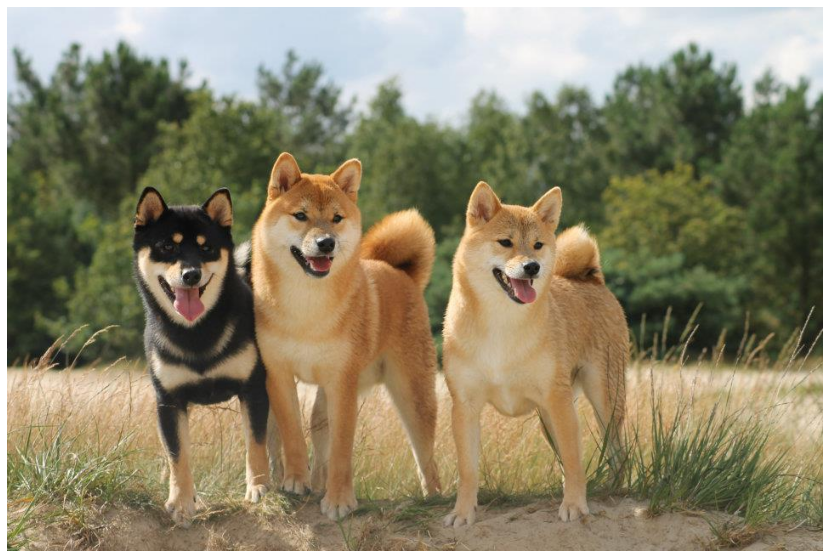

In [20]:
imagem = cv2.imread('/content/gdrive/MyDrive/YOLO-TESTE/cachorros.jpg')
mostrar(imagem)

In [21]:
type(imagem)

numpy.ndarray